In [2]:
from pathlib import Path
import os
import numpy as np
import copy
import matplotlib.pyplot as plt
from ddgclib._complex import Complex
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._curvatures import b_curvatures_hn_ij_c_ij
from data_levelset_geometric_shapes.extract_and_process_interface_points import read_data, \
    extract_and_save_unique_intersection_points, plot_intersection_points, plot_unique_intersections,\
    plot_and_save_levelset_points

In [3]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_coarse/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_coarse")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [4]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  128
Total number of intersections  :  504
Total number of levelset points:  128


In [5]:
corners_and_intersections

[{'Corners': array([[0.3125, 0.375 , 0.4375],
         [0.375 , 0.375 , 0.4375],
         [0.375 , 0.4375, 0.4375],
         [0.3125, 0.4375, 0.4375],
         [0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.49514239]]),
  'Levelset': array([[0.37466445, 0.42575942, 0.47516802]])},
 {'Corners': array([[0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ],
         [0.3125, 0.375 , 0.5625],
         [0.375 , 0.375 , 0.5625],
         [0.375 , 0.4375, 0.5625],
         [0.3125, 0.4375, 0.5625]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.50485761]]),
  'Levelset': array([[0.37466445

In [6]:
cell_corners_and_intersections = corners_and_intersections
def intersection_is_found(intersection, ref_intersections):
    return any([all([np.abs(coord - coord_ref) <= 1e-14 for coord, coord_ref in zip(intersection, ref_inter)]) for ref_inter in ref_intersections])
    # Get unique intersections
all_intersections    = [inter for data in cell_corners_and_intersections for inter in data["Intersections"]]
unique_intersections = np.unique(np.array(all_intersections), axis=0)


In [7]:
def plot_intersections(axes, intersections, corners, plot_thick):
   number_of_inter = len(intersections)
   for idx in range(0, number_of_inter):
      this_inter       = intersections[idx]
      this_inter_faces = find_cell_faces(this_inter, corners)
      for nxt_idx in range(idx+1, number_of_inter):
         next_inter       = intersections[nxt_idx]
         next_inter_faces = find_cell_faces(next_inter, corners)

         if len(this_inter_faces.intersection(next_inter_faces)) > 0:
            if plot_thick:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=1.5, linewidth=0.5, color = "red")
            else:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=0.25, linewidth=0.25, color = "red")


In [8]:
corners       = cell_corners_and_intersections[3]["Corners"]
intersections = cell_corners_and_intersections[3]["Intersections"]

In [9]:
corners, intersections, len(intersections)

(array([[0.3125, 0.4375, 0.4375],
        [0.375 , 0.4375, 0.4375],
        [0.375 , 0.5   , 0.4375],
        [0.3125, 0.5   , 0.4375],
        [0.3125, 0.4375, 0.5   ],
        [0.375 , 0.4375, 0.5   ],
        [0.375 , 0.5   , 0.5   ],
        [0.3125, 0.5   , 0.5   ]]),
 array([[0.375     , 0.49514239, 0.4375    ],
        [0.37388194, 0.5       , 0.4375    ],
        [0.37388194, 0.4375    , 0.5       ],
        [0.35906901, 0.5       , 0.5       ],
        [0.375     , 0.4375    , 0.49514239]]),
 5)

In [10]:
def find_cell_faces(intersection_point, cell_corners):
    all_sides = [
       0 if intersection_point[0] == cell_corners[0][0] else None,
       1 if intersection_point[0] == cell_corners[6][0] else None,
       2 if intersection_point[1] == cell_corners[0][1] else None,
       3 if intersection_point[1] == cell_corners[6][1] else None,
       4 if intersection_point[2] == cell_corners[0][2] else None,
       5 if intersection_point[2] == cell_corners[6][2] else None
       ]
    #return set([side for side in all_sides if side is not None])
    return [side for side in all_sides if side is not None]

In [11]:
# Lexicographic edge matrix

In [12]:
def f_ijk(nverts):
    # Returns the F_ijk matrix of faces depending on the number of vertices 
    if 0:
        # The number of edges e_dim
        e_dim_l = []
        e_dim = e_dim_l
        if nverts == 3:
            e_dim = 3
        elif nverts == 3:
            e_dim = 3
    F_ijk = np.zeros([nverts - 2, 3], dtype=int)
    if nverts == 3:
        F_ijk[:] = [0, 1, 2]
    elif nverts == 4:  # 2 simplices
        F_ijk[0, :] = [0, 1, 2]
        F_ijk[1, :] = [0, 2, 3]
    elif nverts == 4:  # 2 simplices
        F_ijk[0, :] = [0, 1, 2]
    elif nverts == 5:  # 3 simplices
        F_ijk[0, :] = [0, 1, 2]
        F_ijk[1, :] = [0, 2, 4]
        F_ijk[2, :] = [2, 3, 4]
    elif nverts == 6:  # 4 simplices
        F_ijk[0, :] = [0, 1, 2]
        F_ijk[1, :] = [0, 2, 4]
        F_ijk[2, :] = [2, 3, 4]
        F_ijk[3, :] = [0, 3, 4]
        
    return F_ijk#[0]

f_ijk(3), f_ijk(4), f_ijk(5), f_ijk(6)

(array([[0, 1, 2]]),
 array([[0, 1, 2],
        [0, 2, 3]]),
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4]]),
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4],
        [0, 3, 4]]))

In [76]:
def assign_incides(intersections, corners):
    # Return ordered points and connectivity matrix E_ij
    nverts = intersections.shape[0]  # number of intersection in current cell
    pf_indices = []
    pind = 0
    pind_order = []  # or int dtype array of size intersections.shape[0] 
    # Compute the faces 
    for p in intersections:
        pi = find_cell_faces(p, corners)
        pf_indices.append(pi)
        
    # Find the correct order of points of the intersections
    pind_order.append(0)  # Arbitarily select the first point
    pind = 0  # Previous index
    cf = pf_indices[0][0]  # current face
    while len(pind_order) < nverts:  
        for i in range(len(pf_indices)):
            if i == pind:
                continue
            ci = pf_indices[i]
            if cf == ci[0]:
                pind_order.append(i)
                cf = ci[1]  # move on to new face
                pind = i  # Make i the previous index for the next loop
                break
            elif cf == ci[1]:
                pind_order.append(i)
                cf = ci[0]  # move on to new face
                pind = i  # Make i the previous index for the next loop
                break
                
    F_ijk = f_ijk(nverts)  # Triangles present in current cell
    return pind_order, f_ijk(nverts)


corners       = cell_corners_and_intersections[3]["Corners"]
intersections = cell_corners_and_intersections[3]["Intersections"]
corners       = cell_corners_and_intersections[0]["Corners"]
intersections = cell_corners_and_intersections[0]["Intersections"]
p, F_ijk = assign_incides(intersections, corners)
p, F_ijk

([0, 2, 1], array([[0, 1, 2]]))

In [14]:
points = intersections[p]
p, F_ijk, points

([0, 4, 2, 3, 1],
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4]]),
 array([[0.375     , 0.49514239, 0.4375    ],
        [0.375     , 0.4375    , 0.49514239],
        [0.37388194, 0.4375    , 0.5       ],
        [0.35906901, 0.5       , 0.5       ],
        [0.37388194, 0.5       , 0.4375    ]]))

<IPython.core.display.Javascript object>


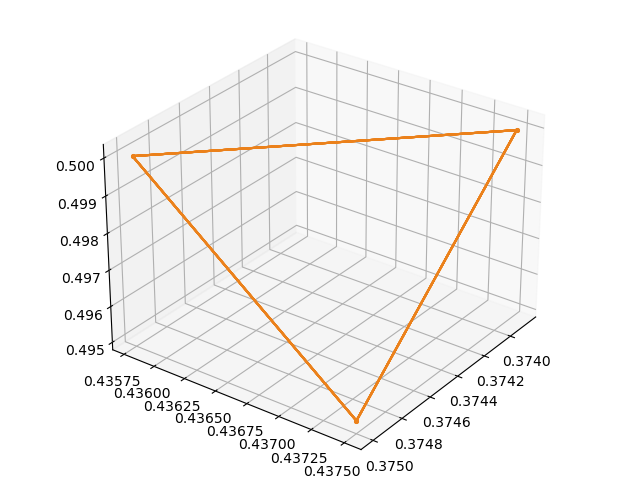

In [78]:
%matplotlib notebook

HC = Complex(3)
points = intersections[p]
for f in F_ijk:
    for fi in f:
        for fj in f:
            vi = HC.V[tuple(points[fi])]
            vj = HC.V[tuple(points[fj])]
            vi.connect(vj)
    
HC.plot_complex()
plt.show()

# Cotan Laplace weights

In [79]:
def distance_matrix(A, B, squared=False):
    """
    Compute all pairwise distances between vectors in A and B.

    Parameters
    ----------
    A : np.array
        shape should be (M, K)
    B : np.array
        shape should be (N, K)

    Returns
    -------
    D : np.array
        A matrix D of shape (M, N).  Each entry in D i,j represnets the
        distance between row i in A and row j in B.

    See also
    --------
    A more generalized version of the distance matrix is available from
    scipy (https://www.scipy.org) using scipy.spatial.distance_matrix,
    which also gives a choice for p-norm.
    """
    M = A.shape[0]
    N = B.shape[0]

    assert A.shape[1] == B.shape[1], f"The number of components for vectors in A \
        {A.shape[1]} does not match that of B {B.shape[1]}!"

    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  A_dots + B_dots -2*A.dot(B.T)

    if squared == False:
        zero_mask = np.less(D_squared, 0.0)
        D_squared[zero_mask] = 0.0
        return np.sqrt(D_squared)

    return D_squared

In [80]:
L_ij = distance_matrix(points, points)  # Validated, but some floating errors!
L_ij, points, F_ijk

(array([[1.49011612e-08, 5.15318027e-03, 2.05156524e-03],
        [5.15318027e-03, 0.00000000e+00, 4.98462326e-03],
        [2.05156524e-03, 4.98462326e-03, 0.00000000e+00]]),
 array([[0.375     , 0.43577987, 0.5       ],
        [0.375     , 0.4375    , 0.49514239],
        [0.37388194, 0.4375    , 0.5       ]]),
 array([[0, 1, 2]]))

In [81]:
        
l_ij = 0.0049846232551304616
l_jk = 0.0642314006615007
l_ki = 0.0049846232551304616
#s * (s - l_ij) * (s - l_jk) * (s - l_ki) = -1.0381964187264072e-06

# Put the 3 triangle lengths into a list:
lengths = [l_ij, l_jk, l_ki]
# Sort the list, python sorts from the smallest to largest element:
lengths.sort()
print(lengths)
# We must have use a ≥ b ≥ c in floating-point stable Heron's formula:
a = lengths[2]
b = lengths[1]
c = lengths[0]
A = (1/4.0) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)) )
A

[0.0049846232551304616, 0.0049846232551304616, 0.0642314006615007]


C:\Users\stefa\AppData\Local\Temp\ipykernel_44864\224629542.py:15: RuntimeWarning: invalid value encountered in sqrt
  A = (1/4.0) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)) )


nan

In [82]:
L_ij

array([[1.49011612e-08, 5.15318027e-03, 2.05156524e-03],
       [5.15318027e-03, 0.00000000e+00, 4.98462326e-03],
       [2.05156524e-03, 4.98462326e-03, 0.00000000e+00]])

In [83]:
a, b, c

(0.0642314006615007, 0.0049846232551304616, 0.0049846232551304616)

In [84]:
0.0049846232551304616 - 0.0049846232551304616 

0.0

In [85]:
(a + (b + c)),  (c - (a - b)) , (c + (a - b)), (a + (b - c)) 

(0.07420064717176161,
 -0.05426215415123978,
 0.0642314006615007,
 0.0642314006615007)

In [86]:
F_ijk

array([[0, 1, 2]])

In [87]:
W_jk = np.zeros_like(L_ij)
for ijk in F_ijk:
    for i_t in range(3): # for each corner i of each ijk \in F_ijk do:
        j_t = (i_t + 1) % 3  # j = (i + 1) (mod 3)
        k_t = (i_t + 2) % 3  # k = (i + 2) (mod 3)
        i = ijk[i_t]
        j = ijk[j_t]
        k = ijk[k_t]
        
        # Find the index of the cell intersection:
        l_ij = L_ij[i][j]
        l_jk = L_ij[j][k]
        l_ki = L_ij[k][i]
        
        # Put lengths into a list:
        lengths = [l_ij, l_jk, l_ki]
        # Sort the list, python sorts from the smallest to largest element:
        lengths.sort()
  
        # We must have use a ≥ b ≥ c in floating-point stable Heron's formula:
        a = lengths[2]
        b = lengths[1]
        c = lengths[0]
        A = (1/4.0) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)) )

        # w_jk computes 1/2 cot(theta_i^jk) :
        w_jk = (1/8.0) * (l_ij**2 + l_ki**2 - l_jk**2)/A
        W_jk[j][k] = w_jk
W_jk

array([[0.        , 0.06158186, 0.        ],
       [0.        , 0.        , 0.14576251],
       [1.16243176, 0.        , 0.        ]])

In [109]:
L_ij

array([[1.49011612e-08, 5.15318027e-03, 2.05156524e-03],
       [5.15318027e-03, 0.00000000e+00, 4.98462326e-03],
       [2.05156524e-03, 4.98462326e-03, 0.00000000e+00]])

In [113]:
points
E_ij = points[:] - points[0]
L_ij = np.linalg.norm(E_ij, axis=1)
L_ij  # ij = 00, 01, 02 

array([0.        , 0.00515318, 0.00205157])

In [114]:
 5.15318027e-03, 2.05156524e-03

(0.00515318027, 0.00205156524)

In [111]:
# Old method
def cotan(theta):
    return 1 / np.tan(theta)

# i = 0
E_ij = points[:] - points[0]
L_ij = np.linalg.norm(E_ij, axis=1)
c = L_ij[j]  # l_ij
a = np.linalg.norm(F[k] - F[i], axis=0)  # l_ik  # Symmetric to b
b = np.linalg.norm(F[k] - F[j], axis=0)  # l_lk
alpha_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))


0.5* cotan(alpha_ij ), 0.5* cotan(beta_ij )

C:\Users\stefa\AppData\Local\Temp\ipykernel_44864\1939235273.py:11: RuntimeWarning: invalid value encountered in arccos
  alpha_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))


NameError: name 'beta_ij' is not defined

### Curvature

In [103]:
# Loop through each edge and compute the local curvature
if intersections.shape[0] == 3:
    # f_ij = (f_j - f_i)
    f_ij = points[1] - points[0]
    # w_jk
    (W_jk[1][2]) * f_ij
    # f_ij = (f_j - f_i)
    f_ij = points[2] - points[0]
    # w_jk
    (W_jk[1][2]) * f_ij

In [104]:
W_jk[1][2] * f_ij

array([-0.00016297,  0.00025073,  0.        ])

In [108]:
# Old method
def cotan(theta):
    return 1 / np.tan(theta)

#E_ij = F[1:] - F[0]
#E_ij = np.vstack([np.zeros(3), E_ij])
L_ij = np.linalg.norm(E_ij, axis=1)
c = L_ij[j]  # l_ij
a = np.linalg.norm(F[k] - F[i], axis=0)  # l_ik  # Symmetric to b
b = np.linalg.norm(F[k] - F[j], axis=0)  # l_lk
alpha_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))
a = np.linalg.norm(F[l] - F[i], axis=0)  # l_
b = np.linalg.norm(F[l] - F[j], axis=0)  # l_lj
beta_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))

0.5* cotan(alpha_ij ), 0.5* cotan(beta_ij )

C:\Users\stefa\AppData\Local\Temp\ipykernel_44864\3713013943.py:10: RuntimeWarning: invalid value encountered in arccos
  alpha_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))


NameError: name 'E_ij' is not defined

In [102]:
HNdA_ij = []
alpha_ij
beta_ij
for v in HC.V:
    N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
    N_f0 = normalized(N_f0)[0]
    F, nn = vectorise_vnn(v)
    # Compute discrete curvatures
    c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
    # Append lists
    c_outd['HNdA_ij']
    HNdA_ij.append(c_outd['HNdA_ij'])
    Theta_i_jk.append(c_outd['Theta_i_jk'])
    
HNdA_ij#[0]  # Vertex 0's curvature?

[array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.00021186, -0.00059828],
        [-0.00259934,  0.00399908,  0.        ]], dtype=float64),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.00021186,  0.00059828],
        [-0.00032594,  0.        ,  0.00141612]], dtype=float64),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.00259934, -0.00399908,  0.        ],
        [ 0.00032594,  0.        , -0.00141612]], dtype=float64)]

In [100]:
HC.plot_complex()

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

<IPython.core.display.Javascript object>


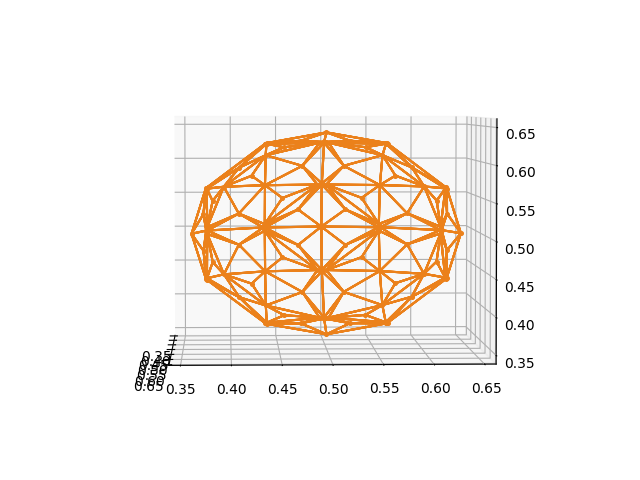

(0.35, 0.65)

In [87]:
%matplotlib notebook
X = np.array(X)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

In [84]:
HC.V.size()

137

In [63]:
HC.V.merge_all(1e-8)
HC.V.size()

137

# Attempt 2:


In [1]:
def HC_curvatures_sessile(HC, bV, r, theta_p, printout=False):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    HNdA_ij = []
    HNdA_i = []
    HN_i = []
    C_ij = []
    K_H_i = []
    HNdA_i_Cij = []
    Theta_i = []

    N_i = []  # Temp cap rise normal

    HNdA_i_cache = {}
    HN_i_cache = {}
    C_ij_cache = {}
    K_H_i_cache = {}
    HNdA_i_Cij_cache = {}
    Theta_i_cache = {}

    for v in HC.V:
        #TODO: REMOVE UNDER NORMAL CONDITIONS:
        if 0:
            if v in bV:
                continue
        N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
        N_f0 = normalized(N_f0)[0]
        N_i.append(N_f0)
        F, nn = vectorise_vnn(v)
        # Compute discrete curvatures
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        # Append lists
        HNdA_ij.append(c_outd['HNdA_ij'])
        HNdA_i.append(c_outd['HNdA_i'])
        #HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        HN_i.append(c_outd['HN_i'])
        C_ij.append(c_outd['C_ij'])
        K_H_i.append(c_outd['K_H_i'])
        HNdA_i_Cij.append(c_outd['HNdA_ij_Cij'])
        Theta_i.append(c_outd['theta_i'])
        
        # CIT paper:
        if 0:
            c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            HN_i_2.append(c_outd2['HN_i'])
            HNdA_i_list.append(c_outd2['HNdA_i'])
            C_ij_i_list.append(c_outd2['C_ij'])

        # Append chace
        HNdA_i_cache[v.x] = c_outd['HNdA_i']
        HN_i_cache[v.x] = c_outd['HN_i']
        C_ij_cache[v.x] = c_outd['C_ij']
        K_H_i_cache[v.x] = c_outd['K_H_i']
        HNdA_i_Cij_cache[v.x] = c_outd['HNdA_ij_Cij']
        Theta_i_cache[v.x] = c_outd['theta_i']

    if printout:
        print('.')
        print(f'HNdA_ij = {HNdA_ij}')
        print(f'HN_i = {HN_i}')
        print(f'C_ij = {C_ij}')
        print(f'K_H_i = {K_H_i}')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')
        print(f'Theta_i= {Theta_i}')
        print(f'np.array(Theta_i) in deg = {np.array(Theta_i) *180/np.pi}')
        print(f'np.array(Theta_i)/np.pi= {np.array(Theta_i) / np.pi}')
        rati = 2 * np.pi /np.array(Theta_i)
        rati = 2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  (np.pi - np.array(Theta_i)/ 2 * np.pi )
        print(f' rati = { rati}')
        print(f'HNdA_i[1] * rati[1]  = {HNdA_ij[1] * rati[1] }')
        print(f'C_ij   = {C_ij }')
        print('.')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')

        print('-')
        print('Errors:')
        print('-')

        print(f'K_H_i - K_f = {np.array(K_H_i) - K_f}')
        print(f'HN_i  - H_f = {HN_i - H_f}')
        print(f'HNdA_i_Cij  - H_f = {HNdA_i_Cij - H_f}')

        #print(f'np.sum(C_ij) = {np.sum(C_ij)}')

    return (HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache)


In [2]:
r = 1 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

NameError: name 'np' is not defined

In [70]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
 K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

In [71]:
HNda_v_cache

{(0.3746273129049242,
  0.43692662220070644,
  0.4983807955328463): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.00204199, -0.00628319,  0.00887179],
        [ 0.00204199,  0.0031416 , -0.01774358],
        [-0.00408398,  0.0031416 ,  0.00887179]], dtype=float128),
 (0.375,
  0.43577986660211937,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.01657331,  0.0468026 ],
        [-0.00315669,  0.00485655,  0.        ],
        [-0.08104135,  0.08104135, -0.        ],
        [-0.00204199,  0.00628319, -0.00887179],
        [ 0.0583166 , -0.04617896,  0.03860144],
        [-0.        , -0.00271788,  0.00767523],
        [ 0.0583166 , -0.04617896, -0.03860144],
        [-0.00204199,  0.00628319,  0.00887179]], dtype=float128),
 (0.37388193871477254,
  0.4375,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [-0.00132579,  0.01925335,  0.01368901],
        [ 0.01165548,  0.        ,  0.05063927],
        [ 0.00528058, -0.0222803 ,

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [72]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([-0.0198687 , -0.13366648,  0.01698527], dtype=float128),
 3.7699111843077515998)

In [74]:
np.sum(HNdA_ij), 8*np.pi*r 

(-0.13654991860508163681, 3.7699111843077515998)

# Check comparison with Qhull


In [71]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)

In [72]:
import scipy.spatial 
tri = scipy.spatial.Delaunay(X)

In [69]:
HC.vf_to_vv(tri.points, tri.simplices)


<IPython.core.display.Javascript object>


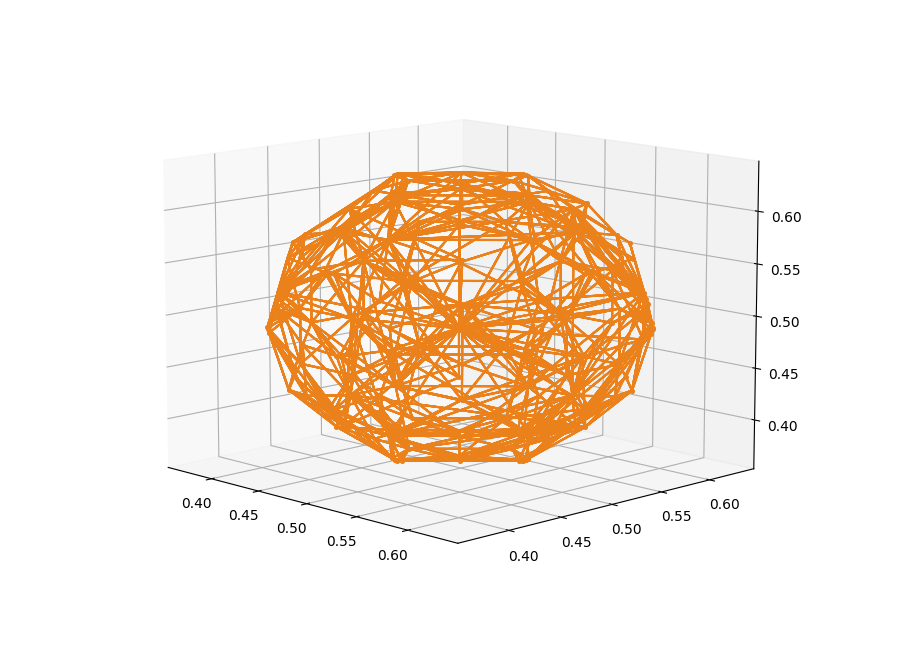

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [70]:
HC.plot_complex()

<IPython.core.display.Javascript object>


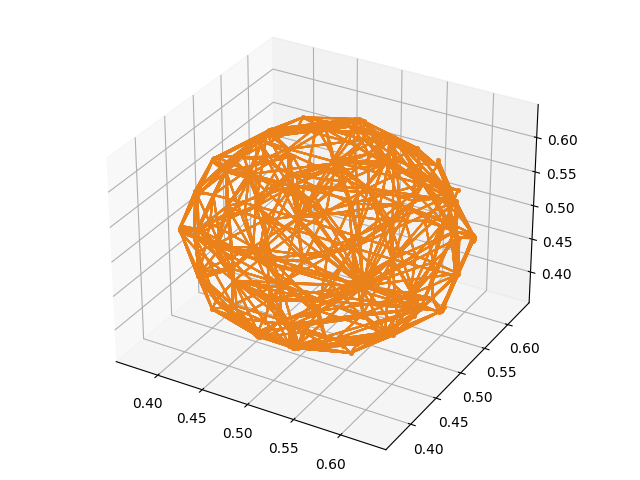

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [81]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
HC.plot_complex()

In [82]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([-0.01165546, -0.05646804,  0.06784001], dtype=float128),
 array([ 0.03550947, -0.00804893, -0.01065854], dtype=float128),
 array([0.04413185, 0.00666992, 0.0468586 ], dtype=float128),
 array([ 0.00444636,  0.03005626, -0.02326132], dtype=float128),
 array([0.02455148, 0.05134485, 0.18617584], dtype=float128),
 array([ 0.06090982, -0.33328692,  0.26242929], dtype=float128),
 array([-0.00841148, -0.01163959,  0.02324165], dtype=float128),
 array([-0.05369451, -0.05761486,  0.04544702], dtype=float128),
 array([0.26513964, 0.26618788, 0.26981843], dtype=float128),
 array([0.00926037, 0.0764498 , 0.00974177], dtype=float128),
 array([0.00386836, 0.01662044, 0.00663776], dtype=float128),
 array([-0.00898072,  0.04692888, -0.07397779], dtype=float128),
 array([-0.03028598,  0.00142382, -0.02903525], dtype=float128),
 array([-0.02516946, -0.00212308, -0.01205039], dtype=float128),
 array([-0.00666992,  0.04413185,  0.0468586 ], dtype=float128),
 array([ 0.0856931 , -0.00762709, -0.042

In [83]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([0.72715232, 0.7022318 , 0.19806352], dtype=float128),
 3.7699111843077515998)

In [85]:
np.sum(HNdA_ij), 4*np.pi*r

(1.6274476395681572159, 1.8849555921538757999)

# QHull without centroids

In [78]:
import scipy.spatial 
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
#HC.plot_complex()

r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([0.72715232, 0.7022318 , 0.19806352], dtype=float128),
 3.7699111843077515998)

In [79]:
np.sum(HNdA_ij), 4*np.pi*r

(1.6274476395681572159, 1.8849555921538757999)

In [80]:
np.linalg.norm(HNdA_ij), 4*np.pi*r 

(2.1004153601880431112, 1.8849555921538757999)

In [88]:
HC.V.size()

137

In [89]:
HC.V.merge_all(1e-8)
HC.V.size()

137